In [139]:
#import imp library 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split ,GridSearchCV 
from sklearn.metrics import r2_score,mean_absolute_error
import statsmodels as sm
import matplotlib.pyplot as plt
import warnings
import math
warnings.filterwarnings('ignore')

In [140]:
#import data and read csv file & see head data
data=pd.read_csv(r"C:\Users\INPshy\Desktop\DATA Science\avocado.csv")
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [141]:
#remove unname column as no use in dataset
data.drop(columns="Unnamed: 0",axis=1,inplace=True)

In [142]:
#data stats overview
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


XLarge Bags higher standard devation we will vizualise thru dist plot

In [143]:
print(data.shape,data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB
(18249, 13) None


'Date','year','region' are object rest are numerical data, 13 column and 18249 rows 

In [144]:
data.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

so no missing values in data set

In [145]:
#encode the region and type column 
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
data['type'] = label.fit_transform(data['type'])
data['region'] = label.fit_transform(data['region'])
data['Date']=label.fit_transform(data['Date'])

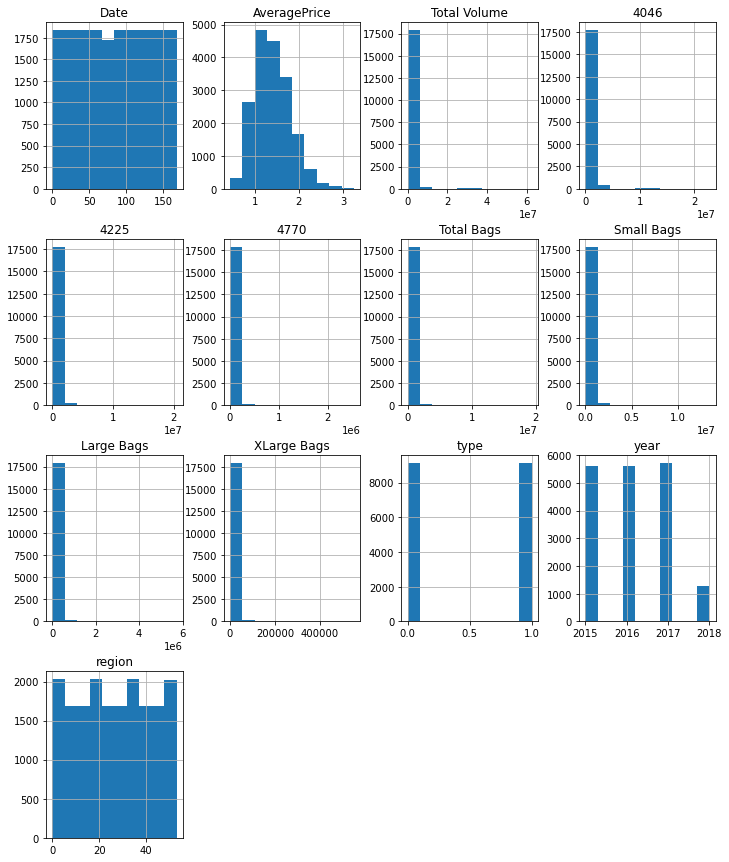

In [146]:
#visualize data distribution and check skewness
data.hist(figsize=(12,15))
plt.show()

Avg Price data is uniformaly disdtributed ,but other features are really high skewed

In [147]:
data.skew()

Date             0.000117
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

4046,4225,4770,TotalBags, Small Bags,XLarge Bags, are skwed data

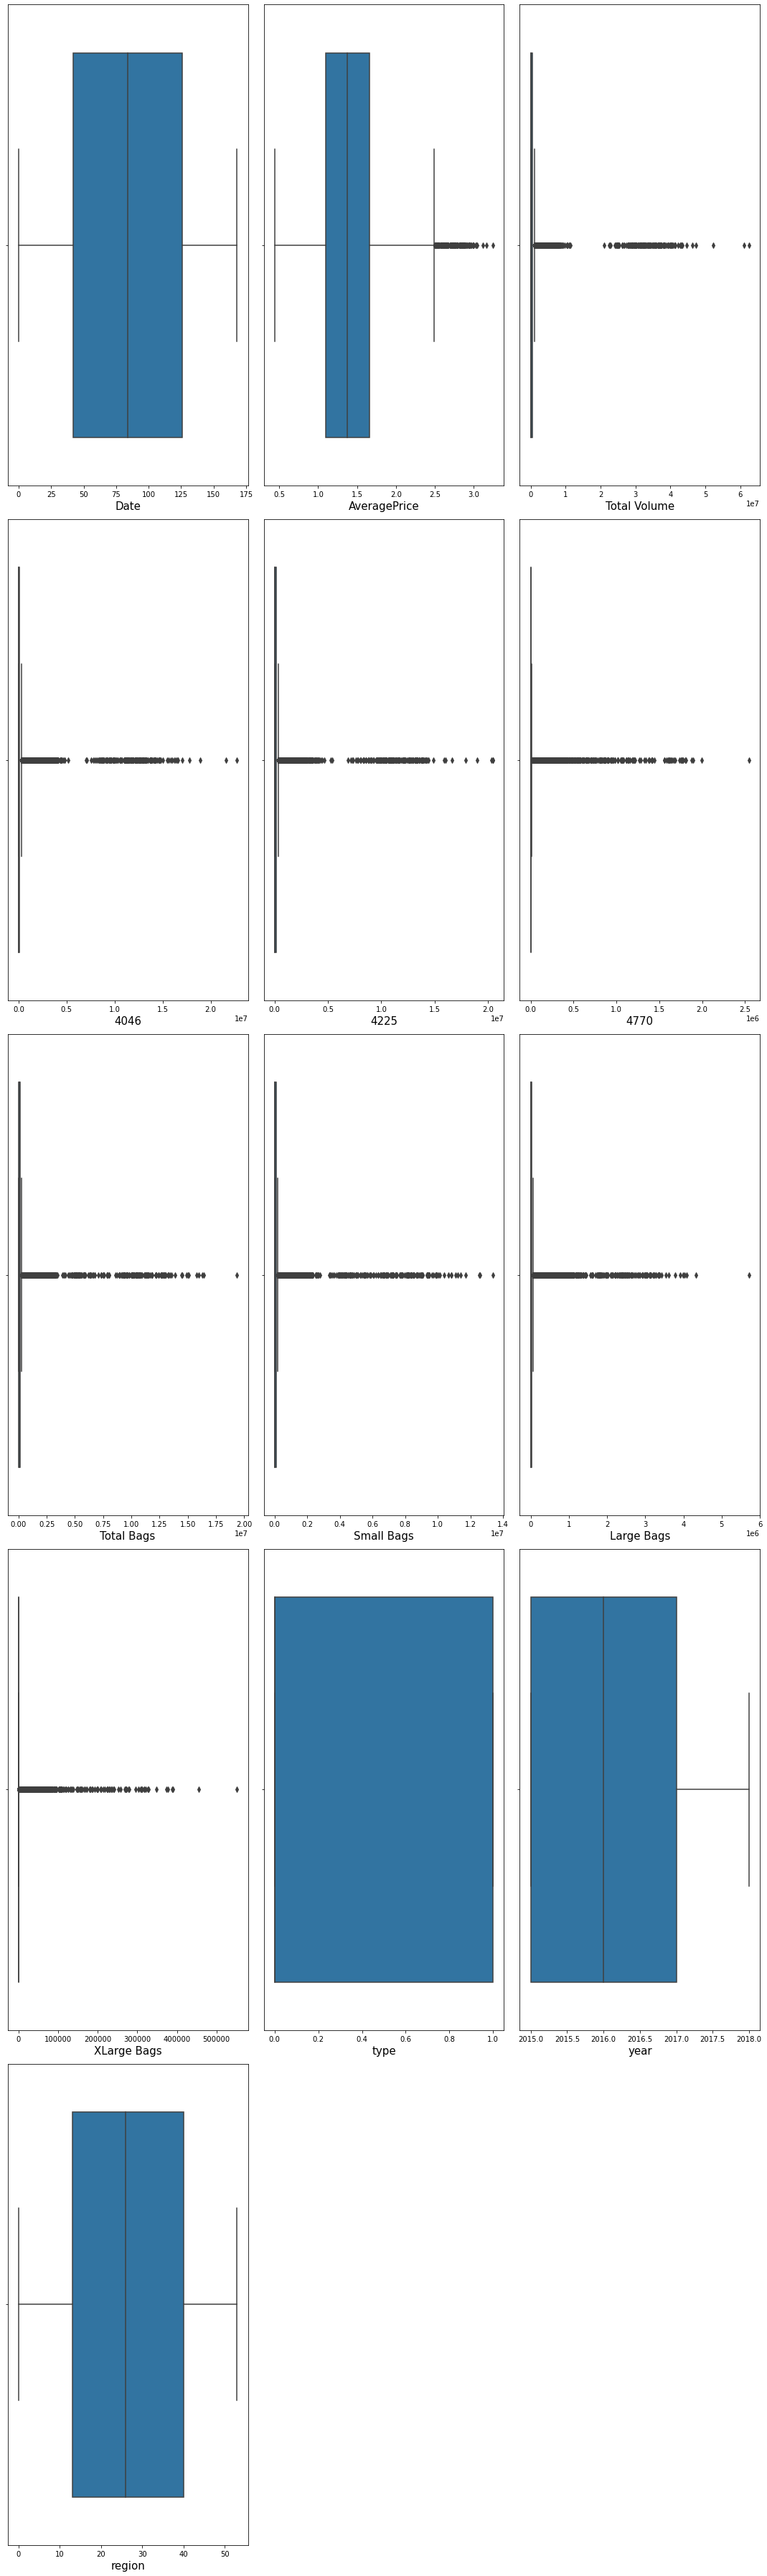

In [148]:
#lest do with boxplot for outlier detection
#Visualize the outliers using boxplot
plt.figure(figsize=(15,50))
graph=1
for column in data:
    if graph<=14:
        ax=plt.subplot(5,3,graph)
        ax=sns.boxplot(data[column],orient="v")
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.tight_layout() 

Total voulume,4046,4225,4270,Total bag,small bag,Large bag,XLarge bag,Type,Year are skewd 

In [149]:
df1=data.drop("AveragePrice",axis=1)  # remove target variable so that we can remove outliers in features data

In [150]:
df1.head(2)

,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,50,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0


In [151]:
#data are mostly right skewd use z score to remove outliers
from scipy import stats
import numpy as np
z=np.abs(stats.zscore(df1))
z

array([[0.67635986, 0.22771641, 0.23081597, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       [0.69685742, 0.23042664, 0.23110251, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       [0.71735497, 0.21208462, 0.23100731, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       ...,
       [1.53737632, 0.24233073, 0.2306933 , ..., 1.00016441, 1.97050371,
        1.70081131],
       [1.51687877, 0.24162464, 0.2304279 , ..., 1.00016441, 1.97050371,
        1.70081131],
       [1.49638121, 0.24125273, 0.22934712, ..., 1.00016441, 1.97050371,
        1.70081131]])

In [152]:
print('row number\n', np.where(z>3)[0])
print('column number\n', np.where(z>3)[1])

row number
 [ 346  359  780 ... 9111 9112 9113]
column number
 [2 2 8 ... 7 7 7]


In [153]:
index=np.where(z>3)[0]

In [154]:
data=data.drop(data.index[index])
data.shape

(17782, 13)

In [155]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,49,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,48,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,47,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


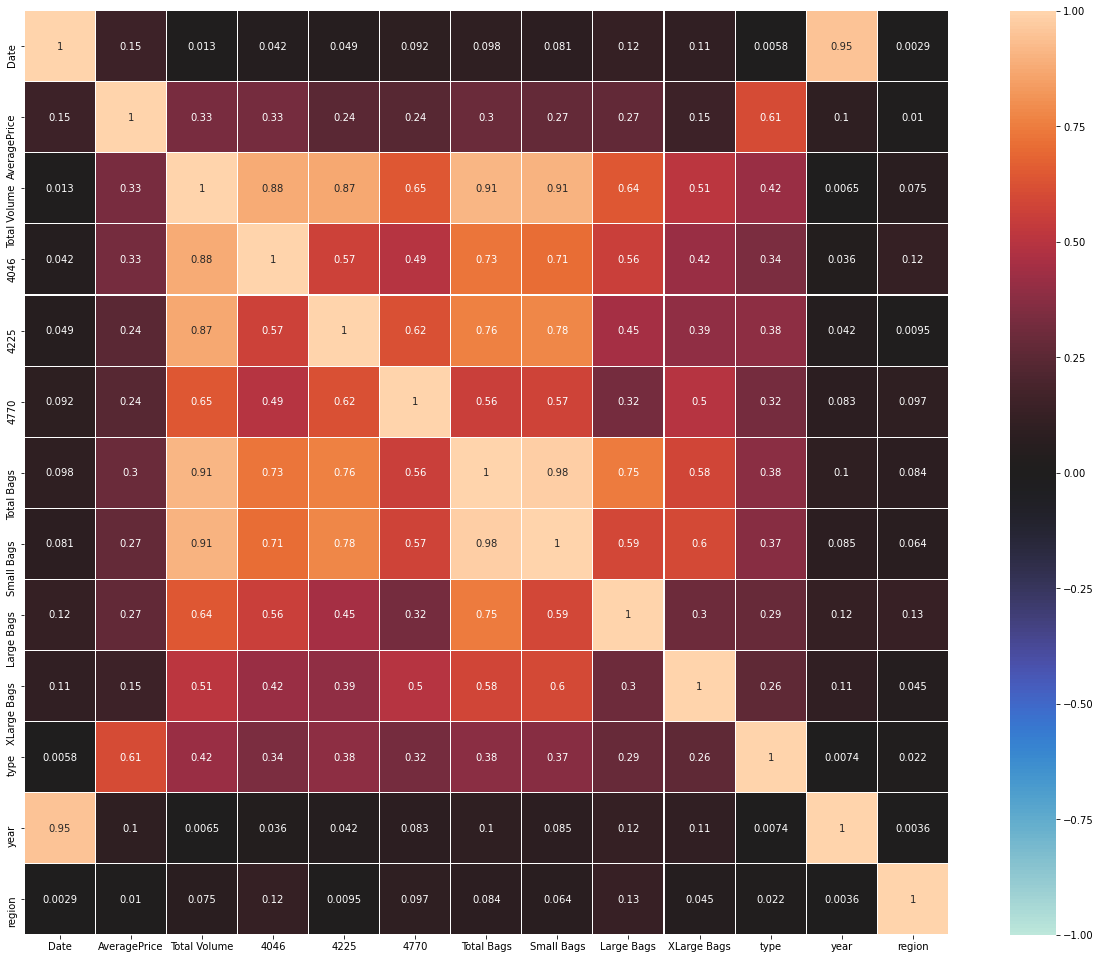

In [156]:
#lets see Plotting Heatmap(Correlation matrix) to check multicollinearity
df_corr=data.corr().abs()
plt.figure(figsize=(22,17))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1)
plt.show()

In [157]:
corr_matrix=data.corr()
corr_matrix['AveragePrice'].sort_values(ascending=False)

AveragePrice    1.000000
type            0.608447
Date            0.150661
year            0.099910
region          0.010428
XLarge Bags    -0.152351
4770           -0.240676
4225           -0.243080
Large Bags     -0.267604
Small Bags     -0.274138
Total Bags     -0.295100
4046           -0.327348
Total Volume   -0.328226
Name: AveragePrice, dtype: float64

Type Date,Year ,region have postive relationship with AveragePrice lets visualize with scatter plot

<AxesSubplot:xlabel='Small Bags', ylabel='Total Bags'>

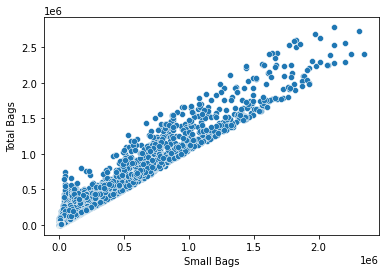

In [158]:
#as per heatmap highest number is smallbag ,vs Totalbag lets see through scatter plot
sns.scatterplot(x='Small Bags',y='Total Bags',data=data)

ok so very strong linear relationship have multicollinearity issue i will drop Total Bags column

<AxesSubplot:xlabel='year', ylabel='Date'>

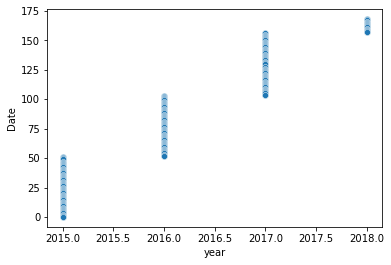

In [159]:
#year and date have also high number lets see through scatter plot
sns.scatterplot(x='year',y='Date',data=data)

Date year also have strong relation drop year

<AxesSubplot:xlabel='Total Bags', ylabel='Total Volume'>

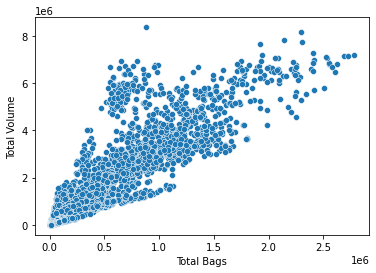

In [160]:
#total bag vs total volume
sns.scatterplot(x='Total Bags',y='Total Volume',data=data)

its show linear relation but not so strong to drop 

<AxesSubplot:xlabel='Small Bags', ylabel='4225'>

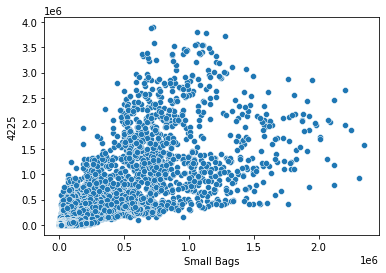

In [161]:
#Small bags vs 4225
sns.scatterplot(x='Small Bags',y='4225',data=data)

no multicollinearity between 4225 and Small Bags

In [162]:
data.drop(columns=['year','Total Bags'],axis=1,inplace=True)

In [163]:
# seprate features and LAble 
x=data.drop(columns="AveragePrice",axis=1)
y=data["AveragePrice"]

In [164]:
#scale the feature data 
scaler=StandardScaler()
x_scale=scaler.fit_transform(x)

In [165]:
#train test split data
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=.25,random_state=10)

In [166]:
#import linear reg to buil model
from sklearn.linear_model import LinearRegression


In [167]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [168]:
lr.score(x_train,y_train)

0.42173500653799745

In [169]:
y_pred=lr.predict(x_test)
mean_absolute_error(y_pred,y_test)

0.23589717934389312

# Hyperparamter Tuning of LR model

In [170]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error
from sklearn.linear_model import Lasso,Ridge,LassoCV,RidgeCV

In [171]:
lassocv=LassoCV(alphas=None, max_iter=100,normalize=True)
lassocv.fit(x_train,y_train) 

LassoCV(max_iter=100, normalize=True)

In [172]:
alpha=lassocv.alpha_
alpha

2.133051173954442e-06

In [173]:
#now with Lasso regression lets see how our data is fitted 
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=2.133051173954442e-06)

In [174]:
lasso_reg.score(x_train,y_train)

0.42167526464376703

In [175]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [176]:
ridgecv.alpha_

0.001

In [177]:
ridge_l1=Ridge(alpha=ridgecv.alpha_)
ridge_l1.fit(x_train,y_train)

Ridge(alpha=0.001)

In [178]:
ridge_l1.score(x_test,y_test)

0.4111972761653536

Cross Validation

In [179]:
from sklearn.model_selection import cross_val_score

In [180]:
cross_val_score(ridge_l1,x_scale,y,cv=5).mean()

0.07722591578425382

In [181]:
#model building with Decesion tree 
from sklearn.tree import DecisionTreeRegressor

In [182]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [183]:
dt.score(x_test,y_test)

0.7905704373259053

# Hyperparamter tuning ofDecesion Tree model

from sklearn.model_selection import GridSearchCV

In [184]:
parametrs={'criterion':['mse'],
    'max_depth':range(1,20,2),
    'min_samples_split':range(2,16, 2),
    'min_samples_leaf':range(1,10,1),
    'min_weight_fraction_leaf':[0.01,0.02,0.1,1]}

In [185]:
grid_search=GridSearchCV(estimator=dt,param_grid=parametrs,cv=5)

In [186]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse'], 'max_depth': range(1, 20, 2),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 16, 2),
                         'min_weight_fraction_leaf': [0.01, 0.02, 0.1, 1]})

In [187]:
grid_search.best_params_

{'criterion': 'mse',
 'max_depth': 13,
 'min_samples_leaf': 8,
 'min_samples_split': 6,
 'min_weight_fraction_leaf': 0.01}

In [188]:
dt=DecisionTreeRegressor(criterion='mse',
                         max_depth=13,min_samples_leaf=2,min_samples_split=10,min_weight_fraction_leaf=0.01)

In [189]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=13, min_samples_leaf=2, min_samples_split=10,
                      min_weight_fraction_leaf=0.01)

In [193]:
dt.score(x_train,y_train)

0.6910673523399868

In [194]:
print('**** accuracy post tuning****')
print(r2_score(y_test,y_pred))

**** accuracy post tuning****
0.41108149474984845


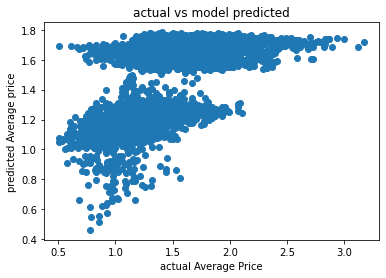

In [195]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual Average Price')
plt.ylabel('predicted Average price')
plt.title('actual vs model predicted')
plt.show()

Model accuracy is not quite upto mark as per plot we will try diffrent model to achive best accuracy

# Cross Validation of Decesion Tree model

In [196]:
cross_val_score(dt,x_scale,y,cv=7).mean()

0.204309174720569

# XGB Booster model

In [197]:
import xgboost as xgb
xgb=xgb.XGBRegressor()

In [198]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [199]:
y_pred=xgb.predict(x_test)
print(r2_score(y_test,y_pred))

0.9092911339665686


# HyperParameter Tuning of XGB

In [200]:
grid_param={ 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2),
 'gamma':range(0,5,1),
'learning_rate':[0.01,0.02,.2,.3,.1]
}

In [201]:
grid_search=GridSearchCV(xgb,param_grid=grid_param,cv=5)

In [202]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=8,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
      

In [203]:
grid_search.best_params_

{'gamma': 0, 'learning_rate': 0.2, 'max_depth': 9, 'min_child_weight': 1}

In [204]:
grid_search.best_score_

0.91719154492705

Cross Validation after tuning

In [205]:
cross_val_score(xgb,x_scale,y,cv=5).mean()

0.45846097240227673

In [206]:
from sklearn.ensemble import GradientBoostingRegressor

In [207]:
gbr=GradientBoostingRegressor()

In [208]:
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)

0.7771230902730668

# HyperParameter Tuning of GradientBoosting 

In [209]:
param={'loss':['ls'],
    'learning_rate':[0.1,0.001,0.01,0.3],
    'n_estimators':[100,150,200,250],
    'subsample':[1.0,2,3,4,7],
    'criterion':['friedman_mse']}

In [210]:
grid_search=GridSearchCV(estimator=gbr,param_grid=param,cv=5)

In [211]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse'],
                         'learning_rate': [0.1, 0.001, 0.01, 0.3],
                         'loss': ['ls'], 'n_estimators': [100, 150, 200, 250],
                         'subsample': [1.0, 2, 3, 4, 7]})

In [212]:
grid_search.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.3,
 'loss': 'ls',
 'n_estimators': 250,
 'subsample': 1.0}

In [214]:
gbr=GradientBoostingRegressor(criterion='friedman_mse',learning_rate=0.3,loss='ls',n_estimators=250,subsample=1)
gbr.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.3, n_estimators=250, subsample=1)

In [215]:
gbr.score(x_train,y_train)

0.9112496019672925

In [216]:
y_pred=gbr.predict(x_test)

In [217]:
print('**** accuracy post tuning****')
print(r2_score(y_test,y_pred))

**** accuracy post tuning****
0.8747131454682835


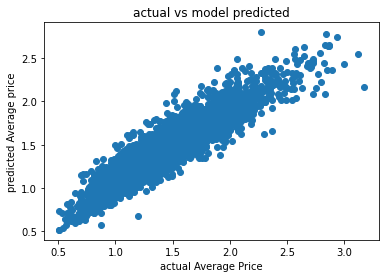

In [218]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual Average Price')
plt.ylabel('predicted Average price')
plt.title('actual vs model predicted')
plt.show()

so as per scatter model this model seems quite have good accuracy 

Cross Validation of GradientboostingRegression model

In [220]:
cross_val_score(gbr,x_scale,y,cv=3).mean()

0.5262903877733581

In [221]:
#saving model GradientboostingRegression model
import pickle
file='pikle_gbr_model'
with open(file ,'wb') as file:
    pickle.dump(gbr, file) 